(efa-lavaan-notebook)=
# Analisi Fattoriale Esplorativa

L'*Exploratory Structural Equation Modeling* (ESEM) rappresenta un framework analitico che collega i modelli di misurazione EFA e il più ampio framework CFA, consentendo di beneficiare di tutti i vantaggi tipicamente associati alla CFA, pur basandosi su un modello di misurazione EFA (che incorpora saturazioni incrociate). Inoltre, lo sviluppo della rotazione target permette di fare affidamento su una specificazione a priori dei caricamenti principali dei fattori, vincolando contemporaneamente i caricamenti incrociati a essere il più vicini possibile a zero, ma stimati liberamente. Questa rotazione consente quindi di fare affidamento su applicazioni confermatorie (cioè basate su una struttura fattoriale a priori) di modelli di misurazione adottando al contempo una struttura fattoriale simile a quella dell'EFA. In questo senso, l'ESEM può essere utilizzato sia per scopi puramente confermativi che esplorativi, conservando i vantaggi sia dell'EFA che della CFA.

In [1]:
source("../_common.R")
suppressPackageStartupMessages({
    library("lavaan")
    library("semTools")
})
set.seed(42)

## Limitazioni della CFA

Se un modello di misurazione contiene più variabili latenti (fattori), di solito sappiamo quali indicatori appartengono a ciascun fattore. Chiamiamo questo la struttura fattoriale a priori. Come abbiamo visto in questo capitolo, l'analisi fattoriale confermativa può essere utilizzata per verificare se questa struttura fattoriale a priori si verifica nei dati. 

Sebbene le CFA siano attualmente probabilmente il metodo più ampiamente utilizzato per esaminare la struttura fattoriale di uno strumento nella ricerca psicologica, non sono prive di limitazioni. Concettualmente, i modelli CFA spesso sono eccessivamente semplici e restrittivi, in quanto assumono "fattori puri", in cui gli elementi saturano solo sui loro fattori latenti a priori (cioè, le saturazioni fattoriali incrociate sono vincolate a zero). Dato che la maggior parte degli item nelle misure psicologiche tende a misurare più di un fattore concettualmente correlato, ci si può e dovrebbe aspettare tra tutti gli item un certo grado di associazione rilevante al costrutto. Questo porta naturalmente alla presenza di diversi item con saturazioni incrociate, seppur piccole, su fattori non target. Obbligare gli elementi a saturare solo su un fattore latente definito a priori e vincolare le saturazioni incrociate a zero porta a un modello più parsimonioso, ma produce un'inflezione artificiale delle associazioni degli item con i fattori. Ciò, a sua volta, produce statistiche di adattamento del modello e indicatori di qualità della misurazione inflazionati, il che si traduce in correlazioni tra fattori positivamente distorte, a meno che tutte le saturazioni su fattori non target siano vicine a zero. Studi di simulazione hanno dimostrato che anche piccole saturazioni incrociate devono essere considerati per evitare stime dei parametri inflazionate e risultati distorti. 

Un altro problema riguarda gli indici di bontà di adattamento, sui quali si basano i modelli CFA. Questi indici di adattamento sono di solito troppo restrittivi quando applicati a strumenti psicologici multi-fattoriali. Pertanto, è quasi impossibile ottenere un "buon" adattamento dei dati al modello senza modifiche significative ai modelli fattoriali. Tuttavia, quando si analizzano gli indicatori a livello di item e le misure di affidabilità, gli stessi modelli che producono un "adattamento scadente" indicano saturazioni ragionevoli e livelli elevati di affidabilità. I ricercatori tendono quindi a incorporare approcci esplorativi controversi basati sui dati del campione (come la correlazione tra termini di errore residuo sugli elementi, o l'introduzione di vincoli sui parametri), all'interno del framework CFA per migliorare l'adattamento tra dati e modello. Pertanto, capita spesso che gli approcci tradizionali CFA non si adattino bene ai costrutti psicologici. 

Pertanto, sono stati sviluppati approcci più innovativi e robusti per convalidare ed valutare strumenti psicometrici al fine di affrontare queste sfide analitiche. Uno di questi promettenti metodi alternativi per superare le limitazioni della CFA è il "Modello di Equazioni Strutturali Esplorativo" (ESEM).

## Exploratory Structural Equation Modeling

L'ESEM è stato sviluppato per incorporare i migliori elementi sia delle CFA [ad esempio, relazioni predittive tra i fattori (corretti per l'errore di misurazione), la possibilità di produrre fattori di metodo, unicità degli elementi correlate, stimare strutture di varianza degli errori complesse, produrre modelli bifattoriali, stimare l'invarianza di misurazione e persino essere specificato nei modelli auto-regressivi] che delle EFA [permettendo caricamenti incrociati] all'interno del tradizionale framework delle Equazioni Strutturali (SEM). Pertanto, l'ESEM rappresenta un compromesso tra l'approccio meccanico iterativo per trovare soluzioni fattoriali ottimali attraverso rotazioni all'interno di un'EFA e l'approccio di modellazione a priori basato sulla teoria restrittiva impiegato nei modelli di misurazione CFA.

L'ESEM è fondamentalmente una tecnica confermativa (anche se può essere utilizzata in modo esplorativo) che, attraverso una rotazione mirata, consente di modellare i dati in modo confermativo permettendo la presenza di caricamenti incrociati tra gli elementi. Anche se consentiti, i caricamenti incrociati (non target) sono vincolati a essere il più vicino possibile a zero. Prendendo spunto dalle CFA, all'interno del framework ESEM, il ricercatore ha maggiore controllo a priori sulla struttura fattoriale prevista di uno strumento. Inoltre, il modo in cui i modelli ESEM identificano le strutture medie è simile ai modelli CFA tradizionali in cui le intercette degli item vengono stimate liberamente e le medie dei fattori latenti sono vincolate a zero. Dato che un modello CFA è anche annidato all'interno di un modello ESEM, entrambi i modelli possono essere direttamente confrontati attraverso gli indici tradizionali di adattamento del modello. Quando una soluzione ESEM si adatta meglio ai dati rispetto a un modello CFA tradizionale, è probabile che la correlazione stimata tra i fattori sia notevolmente meno distorta rispetto al modello CFA.

L'ESEM incorpora modelli EFA più flessibili nella sua stima del modello consentendo agli item di saturare su fattori non target. Tuttavia, ciò significa che il metodo di rotazione impiegato influirà sulla soluzione. I tre metodi di rotazione più popolari utilizzati nell'ESEM sono le rotazioni geomin- e target (oblique), con rotazioni ortogonali utilizzate per i modelli bifattoriali ESEM. Le rotazioni geomin generalmente funzionano bene se il modello stimato non è troppo complesso. D'altra parte, le rotazioni target consentono stime dei modelli ESEM più confermabili, ma dipendono dalle ipotesi a priori formulate su come sono specificate le saturazioni incrociate. Nel caso di modelli più complessiè preferita la rotazione target. Nei modelli bifattoriali ESEM, il fattore generale (G) e i fattori specifici (S) devono essere specificati come totalmente indipendenti l'uno dall'altro, e quindi le relazioni tra i fattori e le varianze condivise devono essere vincolate attraverso la rotazione ortogonale.

Analisi di simulazione suggeriscono che le correlazioni tra i fattori latenti ottenute con metodi ESEM sono meno distorte e più vicine alle vere associazioni. Inoltre, in generale, si può dire che questi modelli sono generalmente più in linea con la concezione teorica e le considerazioni del costrutto che gli strumenti intendono misurare. 

Quando il modello include solo una parte di misurazione, ciò produce quella che è chiamata "analisi fattoriale esplorativa" o EFA. Quando il modello include anche una parte strutturale (cioè regressioni tra le variabili latenti), ciò è definito come "modello di equazioni strutturali esplorativo" o ESEM. 

## Otto Misure di Personalità

In questo esempio pratico analizzeremo nuovamente i dati di {cite:t}`brown2015confirmatory`, ovvero otto misure di personalità raccolte su un campione di 250 pazienti che hanno concluso un programma di psicoterapia. Utilizzeremo un'analisi EFA mediante la funzione `efa()` di `lavaan`.  

Gli item sono i seguenti:

- anxiety (N1), 
- hostility (N2), 
- depression (N3), 
- self-consciousness (N4), 
- warmth (E1), 
- gregariousness (E2), 
- assertiveness (E3), 
- positive emotions (E4). 

In [2]:
varnames <- c("N1", "N2", "N3", "N4", "E1", "E2", "E3", "E4")
sds <- "5.7  5.6  6.4  5.7  6.0  6.2  5.7  5.6"

cors <- "
 1.000
 0.767  1.000
 0.731  0.709  1.000
 0.778  0.738  0.762  1.000
-0.351  -0.302  -0.356  -0.318  1.000
-0.316  -0.280  -0.300  -0.267  0.675  1.000
-0.296  -0.289  -0.297  -0.296  0.634  0.651  1.000
-0.282  -0.254  -0.292  -0.245  0.534  0.593  0.566  1.000"

psychot_cor_mat <- getCov(cors, names = varnames)
n <- 250

Definiamo un modello ad un solo fattore comune.

In [3]:
# 1-factor model
f1 <- '
    efa("efa")*f1 =~ N1 + N2 + N3 + N4 + E1 + E2 + E3 + E4
'

Definiamo un modello con due fattori comuni.

In [4]:
# 2-factor model
f2 <- '
    efa("efa")*f1 +
    efa("efa")*f2 =~ N1 + N2 + N3 + N4 + E1 + E2 + E3 + E4
'

Adattiamo ai dati il modello ad un fattore comune.

In [5]:
efa_f1 <-cfa(
    model = f1,
    sample.cov = psychot_cor_mat,
    sample.nobs = 250,
    rotation = "oblimin"
)

Esaminiamo la soluzione ottenuta.

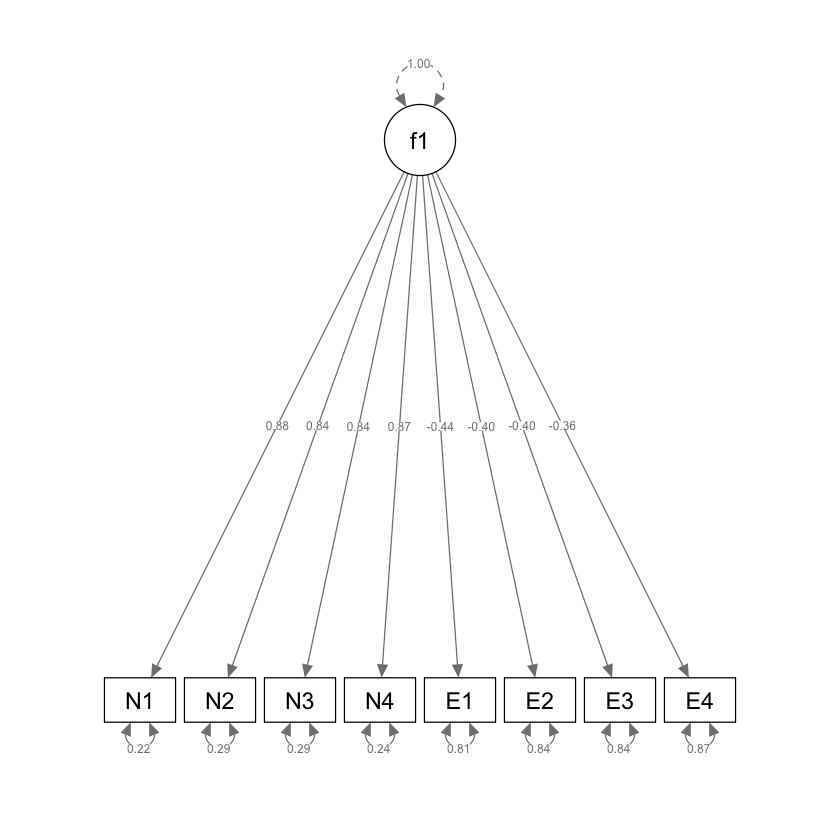

In [6]:
semPlot::semPaths(efa_f1,
    what = "col", whatLabels = "std", style = "mx",
    layout = "tree2", nCharNodes = 7,
    shapeMan = "rectangle", sizeMan = 8, sizeMan2 = 5
)

In [7]:
summary(
    efa_f1,
    fit.measures = TRUE,
    standardized = TRUE,
    rsquare = TRUE
) |>
    print()

lavaan 0.6.17 ended normally after 2 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        16

  Rotation method                      OBLIMIN OBLIQUE
  Oblimin gamma                                      0
  Rotation algorithm (rstarts)                GPA (30)
  Standardized metric                             TRUE
  Row weights                                     None

  Number of observations                           250

Model Test User Model:
                                                      
  Test statistic                               375.327
  Degrees of freedom                                20
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                              1253.791
  Degrees of freedom                                28
  P-value                                        0.000

User Model vers

In [8]:
standardizedSolution(efa_f1)

lhs,op,rhs,est.std,se,z,pvalue,ci.lower,ci.upper
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
f1,=~,N1,0.8803717,0.01821233,48.339322,0.000000e+00,0.8446762,0.9160673
f1,=~,N2,0.8424369,0.02179745,38.648409,0.000000e+00,0.7997147,0.8851591
f1,=~,N3,0.8431190,0.02173170,38.796733,0.000000e+00,0.8005257,0.8857124
f1,=~,N4,0.8719792,0.01898826,45.922019,0.000000e+00,0.8347629,0.9091955
f1,=~,E1,-0.4389273,0.05368053,-8.176656,2.220446e-16,-0.5441392,-0.3337153
f1,=~,E2,-0.3983268,0.05581495,-7.136560,9.570122e-13,-0.5077221,-0.2889315
f1,=~,E3,-0.3991904,0.05577170,-7.157580,8.211209e-13,-0.5085009,-0.2898799
f1,=~,E4,-0.3644271,0.05743899,-6.344595,2.230112e-10,-0.4770055,-0.2518488
N1,~~,N1,0.2249456,0.03206479,7.015345,2.293721e-12,0.1620998,0.2877914


In [9]:
lavaan::residuals(efa_f1, type = "cor") |>
    print()

$type
[1] "cor.bollen"

$cov
       N1     N2     N3     N4     E1     E2     E3     E4
N1  0.000                                                 
N2  0.025  0.000                                          
N3 -0.011 -0.001  0.000                                   
N4  0.010  0.003  0.027  0.000                            
E1  0.035  0.068  0.014  0.065  0.000                     
E2  0.035  0.056  0.036  0.080  0.500  0.000              
E3  0.055  0.047  0.040  0.052  0.459  0.492  0.000       
E4  0.039  0.053  0.015  0.073  0.374  0.448  0.421  0.000



Adattiamo ai dati il modello a due fattori comuni.

In [10]:
efa_f2 <- cfa(
    model = f2,
    sample.cov = psychot_cor_mat,
    sample.nobs = 250,
    rotation = "oblimin"
)

Esaminiamo la soluzione ottenuta.

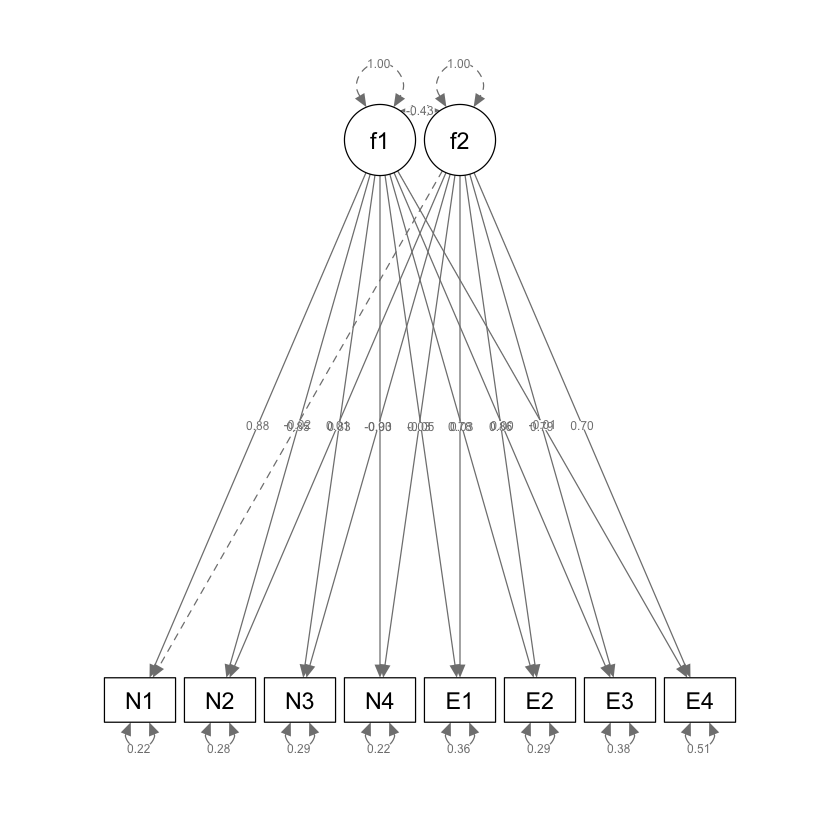

In [11]:
semPlot::semPaths(efa_f2,
    what = "col", whatLabels = "std", style = "mx",
    layout = "tree2", nCharNodes = 7,
    shapeMan = "rectangle", sizeMan = 8, sizeMan2 = 5
)

In [12]:
summary(
    efa_f2,
    fit.measures = TRUE,
    standardized = TRUE,
    rsquare = TRUE
) |>
    print()

lavaan 0.6.17 ended normally after 1 iteration

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        23

  Rotation method                      OBLIMIN OBLIQUE
  Oblimin gamma                                      0
  Rotation algorithm (rstarts)                GPA (30)
  Standardized metric                             TRUE
  Row weights                                     None

  Number of observations                           250

Model Test User Model:
                                                      
  Test statistic                                 9.811
  Degrees of freedom                                13
  P-value (Chi-square)                           0.709

Model Test Baseline Model:

  Test statistic                              1253.791
  Degrees of freedom                                28
  P-value                                        0.000

User Model versu

In [13]:
standardizedSolution(efa_f2)

lhs,op,rhs,est.std,se,z,pvalue,ci.lower,ci.upper
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
f1,=~,N1,0.8761395232,0.02407374,36.39399384,0.000000e+00,0.82895586,0.92332319
f1,=~,N2,0.8531678270,0.02702386,31.57091115,0.000000e+00,0.80020204,0.90613362
f1,=~,N3,0.8279481145,0.02867524,28.87327885,0.000000e+00,0.77174568,0.88415055
f1,=~,N4,0.8978425346,0.02300070,39.03544436,0.000000e+00,0.85276199,0.94292308
f1,=~,E1,-0.0459319488,0.04188336,-1.09666348,2.727885e-01,-0.12802182,0.03615792
f1,=~,E2,0.0348802799,0.03211345,1.08615802,2.774091e-01,-0.02806092,0.09782148
f1,=~,E3,0.0004048221,0.04030477,0.01004402,9.919862e-01,-0.07859108,0.07940073
f1,=~,E4,-0.0064182980,0.04931573,-0.13014707,8.964501e-01,-0.10307536,0.09023876
f2,=~,N1,-0.0170399299,0.03201090,-0.53231646,5.945068e-01,-0.07978014,0.04570028


Anche se abbiamo introdotto finora soltanto la misura di bontà di adattamento del chi-quadrato, aggiungiamo qui il calcolo di altre misure di bontà di adattamento che discuteremo in seguito.

In [14]:
fit_measures_robust <- c(
    "chisq", "df", "pvalue", "cfi", "rmsea", "srmr"
)

Confrontiamo le misure di bontà di adattamento del modello che ipotizza un solo fattore comune e il modello che ipotizza la presenza di due fattori comuni.

In [15]:
# collect them for each model
rbind(
    fitmeasures(efa_f1, fit_measures_robust),
    fitmeasures(efa_f2, fit_measures_robust)
) %>%
    # wrangle
    data.frame() %>%
    mutate(
        chisq = round(chisq, digits = 0),
        df = as.integer(df),
        pvalue = ifelse(pvalue == 0, "< .001", pvalue)
    ) %>%
    mutate_at(vars(cfi:srmr), ~ round(., digits = 3))

chisq,df,pvalue,cfi,rmsea,srmr
<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>
375,20,< .001,0.71,0.267,0.187
10,13,0.709310449320098,1.00,0.000,0.010


In [16]:
lavaan::residuals(efa_f2, type = "cor") |>
    print()

$type
[1] "cor.bollen"

$cov
       N1     N2     N3     N4     E1     E2     E3     E4
N1  0.000                                                 
N2  0.018  0.000                                          
N3 -0.014 -0.006  0.000                                   
N4 -0.003 -0.013  0.017  0.000                            
E1 -0.003  0.015 -0.012  0.000  0.000                     
E2 -0.009 -0.004  0.006  0.007  0.006  0.000              
E3  0.015 -0.008  0.011 -0.016  0.006 -0.010  0.000       
E4 -0.001  0.000 -0.013  0.009 -0.024  0.006  0.016  0.000



L'evidenza empirica supporta la superiorità del modello a due fattori rispetto a quello ad un solo fattore comune. In particolare, l'analisi fattoriale esplorativa svolta mediante la funzione `efa()` evidenzia la capacità del modello a due fattori di fornire una descrizione adeguata della struttura dei dati e di distinguere in modo sensato tra i due fattori ipotizzati.

## Considerazioni Conclusive

L'Exploratory Structural Equation Modeling (ESEM) rappresenta un ponte significativo tra i modelli di misurazione tradizionali dell'Exploratory Factor Analysis (EFA) e il più esteso quadro del Confirmatory Factor Analysis/Structural Equation Modeling (CFA/SEM). Grazie a questo, l'ESEM combina i benefici dell'EFA con quelli del CFA/SEM, fornendo un approccio più flessibile e inclusivo nell'analisi dei dati. Tale integrazione ha segnato un progresso notevole nella ricerca statistica, evidenziando l'importanza dell'EFA che precedentemente era sottovalutata.

L'ESEM e il quadro bifattoriale-ESEM, in particolare, offrono una rappresentazione più fedele e precisa della multidimensionalità dei costrutti psicometrici, che è spesso presente nelle misurazioni. Questo approccio riconosce e gestisce meglio la natura multidimensionale dei costrutti, a differenza dell'approccio tradizionale del CFA, che tende a sovrastimare le correlazioni tra i fattori quando non considera adeguatamente la loro natura gerarchica e interconnessa (Asparouhov et al., 2015; Morin et al., 2020).

Nonostante questi vantaggi, l'ESEM presenta alcune limitazioni che devono essere considerate:

1. **Complessità Computazionale**: L'ESEM può essere più complesso e richiedere maggiori risorse computazionali rispetto agli approcci tradizionali, soprattutto quando si gestiscono grandi set di dati o modelli con molti fattori.
2. **Interpretazione dei Risultati**: A causa della sua flessibilità, l'ESEM può produrre risultati che sono più difficili da interpretare. Ad esempio, la sovrapposizione tra i fattori può complicare l'interpretazione dei costrutti.
3. **Rischio di Overfitting**: La maggiore flessibilità dell'ESEM può anche portare a un rischio maggiore di overfitting, specialmente in campioni più piccoli o con modelli eccessivamente complessi.
4. **Necessità di Esperienza e Conoscenza**: Per utilizzare efficacemente l'ESEM, è richiesta una comprensione approfondita della teoria sottostante e delle tecniche statistiche, che può essere una barriera per alcuni ricercatori.

Nonostante queste limitazioni, ci si aspetta che ulteriori sviluppi e applicazioni dell'ESEM portino a soluzioni più integrate e a un consenso più ampio sulle migliori pratiche nell'uso di questo potente strumento statistico.